In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
N = np.exp(15.57 + 0.3 * np.random.normal(0,1,1000))
N0 = np.exp(12.18 + 0.06 * np.random.normal(0,1,1000))
t = 2.4 + 0.5 * np.random.normal(0,1,1000)
delta = 12 + 3 * np.random.normal(0,1,1000)
T = np.log2(N/(2*N0)) * t + delta

Question 1

10th percentile:  16.479699724615852
25th percentile:  18.64767028059912
50th percentile:  21.147760046394367
75th percentile:  23.689844829155476
90th percentile:  25.941756670327532


(array([ 3.,  3.,  3., 12., 12., 20., 27., 39., 51., 44., 61., 76., 79.,
        85., 75., 72., 73., 76., 35., 48., 40., 19., 15., 14.,  4.,  6.,
         3.,  3.,  1.,  1.]),
 array([10.7664239 , 11.51941962, 12.27241535, 13.02541107, 13.77840679,
        14.53140251, 15.28439823, 16.03739395, 16.79038968, 17.5433854 ,
        18.29638112, 19.04937684, 19.80237256, 20.55536828, 21.30836401,
        22.06135973, 22.81435545, 23.56735117, 24.32034689, 25.07334261,
        25.82633833, 26.57933406, 27.33232978, 28.0853255 , 28.83832122,
        29.59131694, 30.34431266, 31.09730839, 31.85030411, 32.60329983,
        33.35629555]),
 <BarContainer object of 30 artists>)

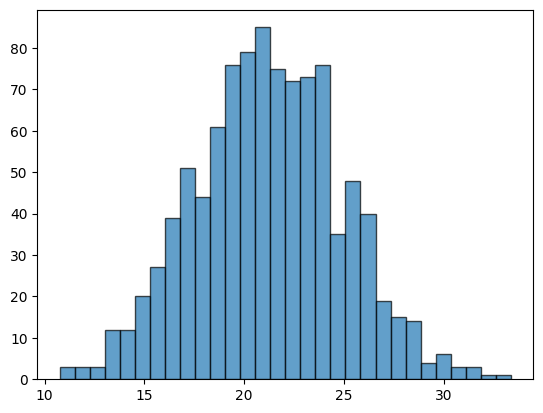

In [71]:
ten = np.percentile(T, 10)
twenty_five = np.percentile(T, 25)
fifty = np.percentile(T, 50)
seventy_five = np.percentile(T, 75)
ninety = np.percentile(T, 90)
print("10th percentile: ", ten)
print("25th percentile: ", twenty_five)
print("50th percentile: ", fifty)
print("75th percentile: ", seventy_five)
print("90th percentile: ", ninety)
plt.hist(T, bins=30, edgecolor='black', alpha=0.7)

Question 2

In [72]:
N_prime = np.exp(15.57 + 0.3 * np.random.normal(0,4,1000))
delta_prime = 12 + 3 * np.random.normal(0,2,1000)
T1 = np.log2(N_prime/(2*N0)) * t + delta
T2 = np.log2(N/(2*N0)) * t + delta_prime

In [73]:
print(np.var(T1))
print(np.var(T2))

31.668578624977798
41.790831341635695


Question 3

In [52]:
def dist_def(n):
    N = np.exp(15.57 + 0.3 * np.random.standard_t(df=5,size=1000))
    N0 = np.exp(12.18 + 0.06 * np.random.standard_t(df=5,size=1000))
    t = 2.4 + 0.5 * np.random.standard_t(df=5,size=1000)
    delta = 12 + 3 * np.random.standard_t(df=5,size=1000)
    T = np.log2(N/(2*N0)) * t + delta
    return T

10th percentile:  16.495888405310744
25th percentile:  18.8013439570936
50th percentile:  21.259205640278516
75th percentile:  23.83271479327615
90th percentile:  26.24854894277917


(array([ 2.,  2.,  2.,  6., 10., 12., 18., 32., 38., 46., 70., 83., 79.,
        84., 76., 93., 70., 55., 63., 42., 41., 25., 20., 11.,  7.,  4.,
         5.,  1.,  2.,  1.]),
 array([ 9.73566191, 10.54281324, 11.34996457, 12.1571159 , 12.96426722,
        13.77141855, 14.57856988, 15.38572121, 16.19287254, 17.00002387,
        17.8071752 , 18.61432653, 19.42147786, 20.22862919, 21.03578052,
        21.84293185, 22.65008318, 23.45723451, 24.26438584, 25.07153717,
        25.8786885 , 26.68583983, 27.49299116, 28.30014249, 29.10729382,
        29.91444515, 30.72159648, 31.5287478 , 32.33589913, 33.14305046,
        33.95020179]),
 <BarContainer object of 30 artists>)

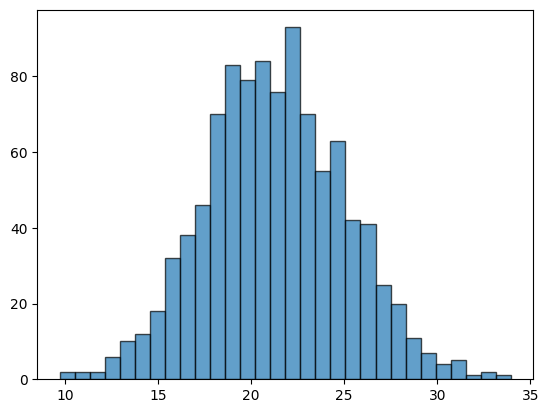

In [53]:
ten = np.percentile(T, 10)
twenty_five = np.percentile(T, 25)
fifty = np.percentile(T, 50)
seventy_five = np.percentile(T, 75)
ninety = np.percentile(T, 90)
print("10th percentile: ", ten)
print("25th percentile: ", twenty_five)
print("50th percentile: ", fifty)
print("75th percentile: ", seventy_five)
print("90th percentile: ", ninety)
plt.hist(T, bins=30, edgecolor='black', alpha=0.7)

Question 4

In [58]:
T_star = dist_def(3)
T_star_gap = np.percentile(T_star, 90) - np.percentile(T_star, 10)
T_star1 = dist_def(7)
T_star1_gap = np.percentile(T_star1, 90) - np.percentile(T_star1, 10)
T_star2 = dist_def(9)
T_star2_gap = np.percentile(T_star2, 90) - np.percentile(T_star2, 10)
print(T_star_gap, T_star1_gap, T_star2_gap)

12.36689584502275 12.044075223954495 11.51793328267607


It seems that the variance goes down as we add more freedom with the parameter v 

Question 5

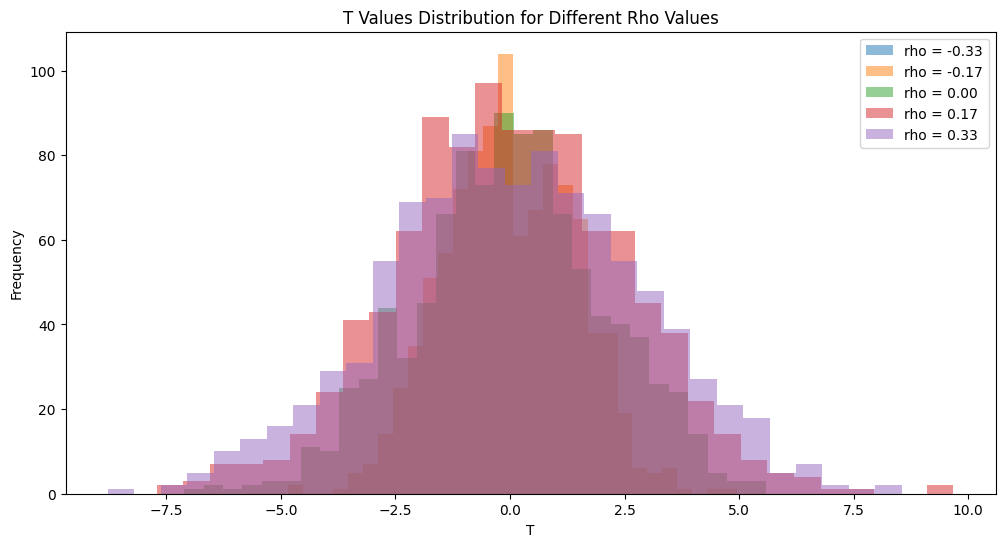

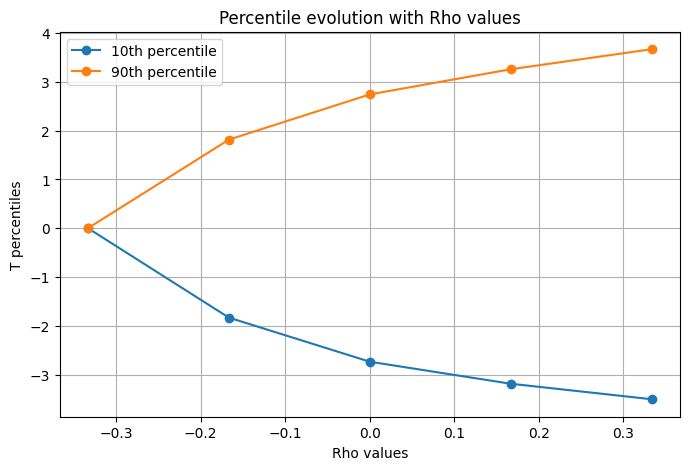

In [75]:
def simulate_T(rho, n_samples=1000):
    mean = np.zeros(4)  # Moyenne nulle
    Sigma = np.array([[1, rho, rho, rho],
                      [rho, 1, rho, rho],
                      [rho, rho, 1, rho],
                      [rho, rho, rho, 1]])  

    samples = np.random.multivariate_normal(mean, Sigma, n_samples)
    T = np.sum(samples, axis=1)
    
    return T

rho_values = np.linspace(-1/3, 1/3, 5) 
quantiles = []

plt.figure(figsize=(12, 6))

for rho in rho_values:
    T_samples = simulate_T(rho)
    q10, q90 = np.percentile(T_samples, [10, 90])
    quantiles.append((q10, q90))
    
    plt.hist(T_samples, bins=30, alpha=0.5, label=f"rho = {rho:.2f}")

plt.xlabel("T")
plt.ylabel("Frequency")
plt.legend()
plt.title("T Values Distribution for Different Rho Values")
plt.show()

# Étudier l'évolution des quantiles
q10_values, q90_values = zip(*quantiles)

plt.figure(figsize=(8, 5))
plt.plot(rho_values, q10_values, label="10th percentile", marker="o")
plt.plot(rho_values, q90_values, label="90th percentile", marker="o")
plt.xlabel("Rho values")
plt.ylabel("T percentiles")
plt.legend()
plt.title("Percentile evolution with Rho values")
plt.grid()
plt.show()